In [ ]:
# Conctando ou drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv')

In [ ]:
dataset.head(5)

In [ ]:
dataset.describe()

In [ ]:
dataset.loc[dataset.Outcome==1,:]

In [ ]:
diabeticos = dataset.loc[dataset.Outcome==1,:]
sadios = dataset.loc[dataset.Outcome==0,:]

In [ ]:
sadios.head(268)

In [ ]:
 dados1 = pd.concat([diabeticos, sadios.head(268)])
#  Sadios com a mesma quantidade de diabeticos

In [ ]:
# sadios.sample(n=268, replace=True)
dados2 = pd.concat([diabeticos,sadios.sample(n=268, replace=True)])
# Sadios com a mesma quantidade escolhedos aleatoriamente

In [ ]:
dados3 = pd.concat([diabeticos.sample(n=500, replace=True), sadios])
# 500 sadios com 500 diabeticos escolhidos atravez reamostragem aleatoria com reposicao.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib as plt

In [ ]:
correlacao = dataset.corr()
sns.heatmap(correlacao, annot=True)

In [ ]:
# correlacao = dataset.corr()
sns.heatmap(dados1.corr(), annot=True)

In [ ]:
sns.heatmap(dados2.corr(), annot=True)

In [ ]:
sns.heatmap(dados3.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test  =  train_test_split(dados1.iloc[:,:-1], dados1.iloc[:,-1], test_size=30, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizador  = StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clt = clf.fit(X_train, y_train)

In [ ]:
# # Verificando o score
# clf.score(X_train, y_train)

from sklearn import metrics

metrics.accuracy_score(y_test,clf.predict(X_test))
# Visualizando essa arvore
# tree.plot_tree(clf)

0.8

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

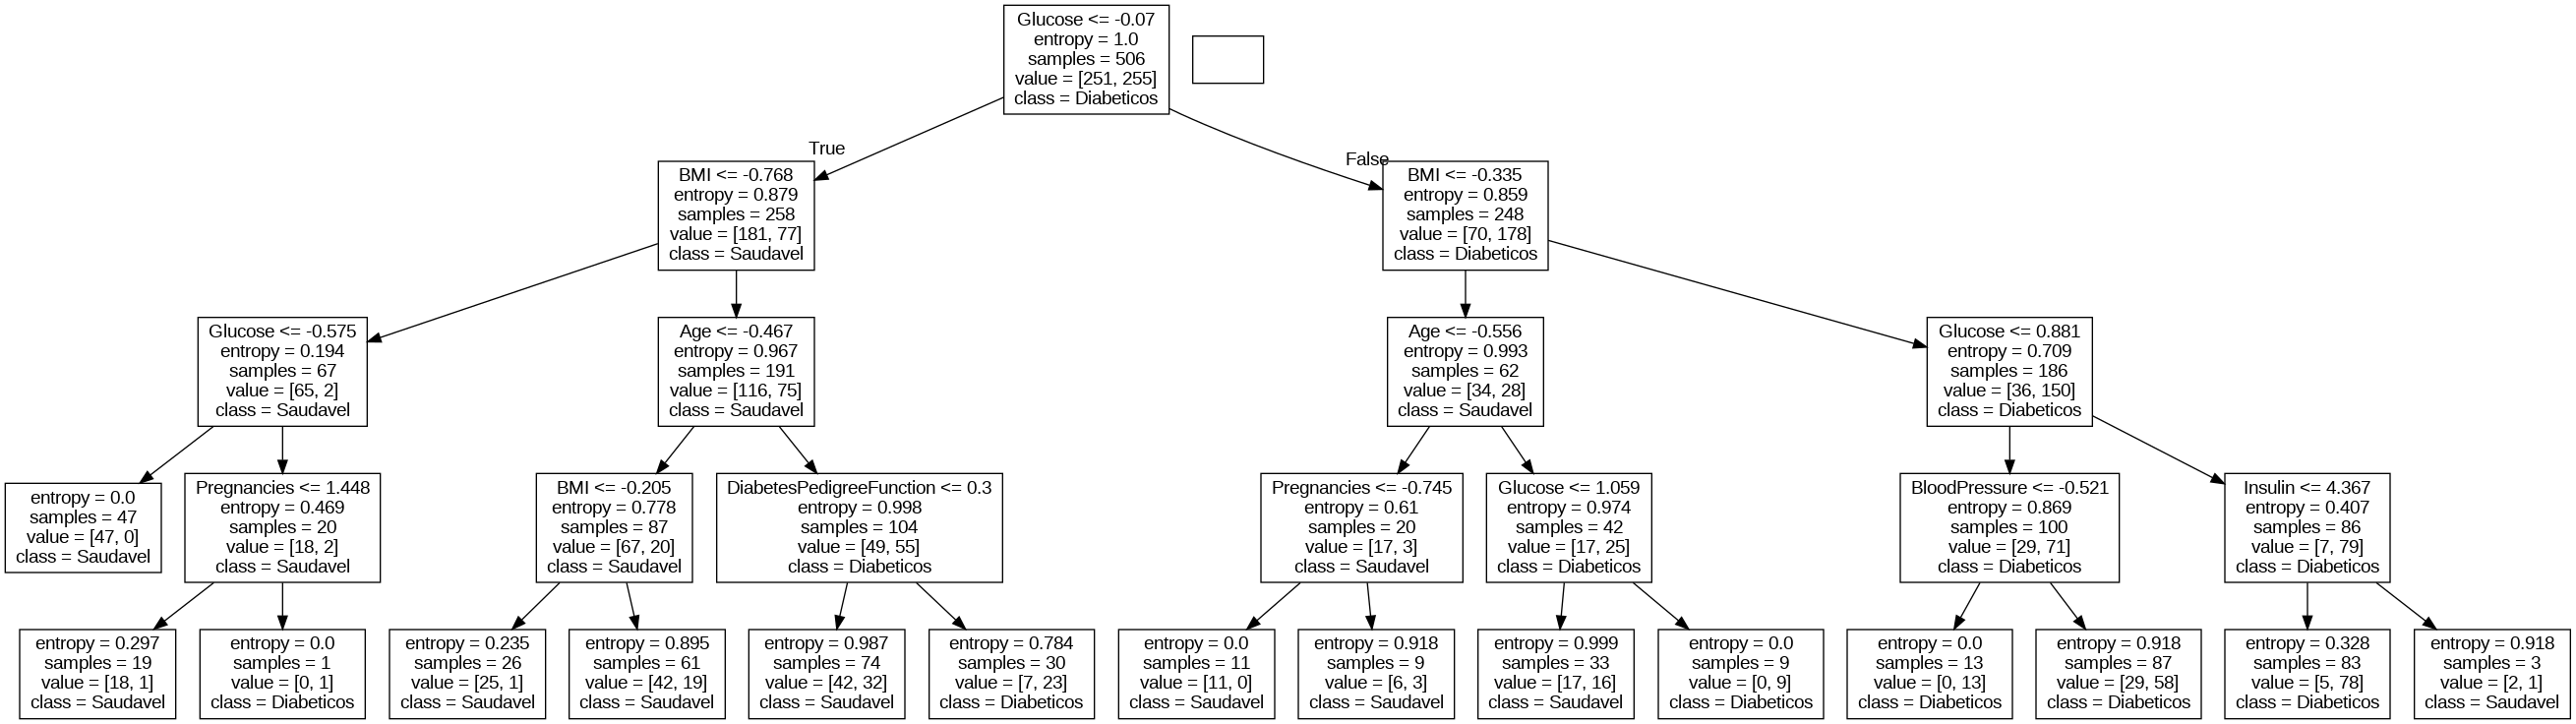

In [ ]:
dat_data=StringIO()
export_graphviz(clf,
                out_file=dat_data,
                feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
                class_names=["Saudavel", "Diabeticos"])
graph = pydotplus.graph_from_dot_data(dat_data.getvalue())
Image(graph.create_png())

In [ ]:
list(dataset.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']